# In this notebook we visualize effects of inserting a single CTCF in multiple backgrounds

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
# def load_data(h5_dirs, scd_stats, models=[1]):
#     dfs = []
#     for h5_file in glob.glob(h5_dirs):
        
#         dfs.append(
#             akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
#         )
#     dfs = pd.concat(dfs)

#     for stat in scd_stats:
#         for model in models:
#             dfs[f"mean_{stat}_score_m{model}"] = (
#                 dfs[f"{stat}_h1_m{model}_t0"]
#                 + dfs[f"{stat}_h1_m{model}_t1"]
#                 + dfs[f"{stat}_h1_m{model}_t2"]
#                 + dfs[f"{stat}_h1_m{model}_t3"]
#                 + dfs[f"{stat}_h1_m{model}_t4"]
#                 + dfs[f"{stat}_h1_m{model}_t5"]
#             ) / 6
        
#     return dfs.reset_index(drop=True)


# import numpy as np

def load_data(h5_dirs, scd_stats, models=[1]):
    dfs = []
    for h5_file in glob.glob(h5_dirs):
        
        dfs.append(
            akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
        )
    # dfs = pd.concat(dfs)
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner')

    # dfs = merged_df
    # df_1 = dfs[0]
    for stat in scd_stats:
        for model in models:
            merged_df[f"mean_{stat}_score_m{model}"] = (
                merged_df[f"{stat}_h1_m{model}_t0"]
                + merged_df[f"{stat}_h1_m{model}_t1"]
                + merged_df[f"{stat}_h1_m{model}_t2"]
                + merged_df[f"{stat}_h1_m{model}_t3"]
                + merged_df[f"{stat}_h1_m{model}_t4"]
                + merged_df[f"{stat}_h1_m{model}_t5"]
            ) / 6
        
        # Calculate mean score over models for current statistic
        mean_score = np.mean([
            merged_df[f"mean_{stat}_score_m{model}"] for model in models
        ], axis=0)
        
        # Add mean score column to DataFrame
        merged_df[f"mean_{stat}_score"] = mean_score
    
    return merged_df.reset_index(drop=True)


In [3]:
one_strong_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/one_strong_motif_in_different_backgrounds_config_test_1/*/*/*.h5"
)
one_weak_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/one_weak_motif_in_different_backgrounds_config_test/*/*/*.h5"
)
two_strong_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/two_strong_motif_in_different_backgrounds/*.h5"
)
two_weak_motif_in_different_backgrounds_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/two_weak_motif_in_different_backgrounds/*.h5"
)

scd_stats = ["SCD"]

one_strong_motif_in_different_backgrounds_df = load_data(one_strong_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0,1,2,3,4,5,6])
one_weak_motif_in_different_backgrounds_df = load_data(one_weak_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0,1,2,3,4,5,6])
two_strong_motif_in_different_backgrounds_df = load_data(two_strong_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0])
two_weak_motif_in_different_backgrounds_df = load_data(two_weak_motif_in_different_backgrounds_h5_dirs, scd_stats, models=[0])

one_strong_motif_in_different_backgrounds_df

/tmp/SLURM_12708575/ipykernel_162560/215884272.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_x', 'CTCF_1_insert_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner')
/tmp/SLURM_12708575/ipykernel_162560/215884272.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_x', 'CTCF_1_insert_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner')
/tmp/SLURM_12708575/ipykernel_162560/215884272.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'CTCF_1_genomic_SCD_x', 'CTCF_1_insert_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df, on='background_seqs', how='inner')
/tmp/SLURM_12708575/ipykernel_162560/215884272.py:36: FutureWarn

,CTCF_1_genomic_SCD_x,CTCF_1_insert_x,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_seqs,CTCF_1_genomic_SCD_y,...,SCD_h1_m6_t4,SCD_h1_m6_t5,mean_SCD_score_m0,mean_SCD_score_m1,mean_SCD_score_m2,mean_SCD_score_m3,mean_SCD_score_m4,mean_SCD_score_m5,mean_SCD_score_m6,mean_SCD_score
0,53.66,"chr12,35192359,35192378,-,60,0,>",59.90625,85.5625,90.3750,90.6250,82.8125,66.37500,0,53.66,...,72.3125,65.37500,75.93750,79.2500,75.0000,84.0625,80.12500,67.9375,79.4375,77.3750
1,53.66,"chr12,35192359,35192378,-,60,0,>",53.50000,77.8125,86.6250,86.6250,78.1875,62.37500,1,53.66,...,65.1875,59.06250,65.50000,74.1875,65.3125,69.2500,69.56250,74.5000,70.8125,69.8750
2,53.66,"chr12,35192359,35192378,-,60,0,>",67.12500,90.3125,104.9375,101.9375,97.7500,79.81250,2,53.66,...,68.3125,61.28125,77.62500,90.3125,89.5000,84.0625,78.56250,85.3125,73.6875,82.7500
3,53.66,"chr12,35192359,35192378,-,60,0,>",90.06250,110.3750,84.7500,82.9375,93.6875,74.37500,3,53.66,...,68.5000,61.03125,93.18750,89.4375,89.1875,75.1250,81.62500,87.1875,75.6875,84.5000
4,53.66,"chr12,35192359,35192378,-,60,0,>",70.50000,97.1250,122.6250,119.1875,110.4375,91.68750,4,53.66,...,117.8125,103.25000,87.81250,101.9375,90.0000,79.8750,100.93750,92.2500,117.1875,95.6875
5,53.66,"chr12,35192359,35192378,-,60,0,>",72.75000,103.0000,114.2500,117.3750,102.8750,85.37500,5,53.66,...,87.3125,80.25000,96.68750,99.3125,81.5625,82.4375,77.18750,90.3125,96.5000,89.1250
6,53.66,"chr12,35192359,35192378,-,60,0,>",67.56250,97.5000,105.1250,104.3750,96.9375,77.81250,6,53.66,...,98.3125,88.37500,83.12500,91.5625,77.3750,86.0000,75.00000,89.5000,103.0000,86.5000
7,53.66,"chr12,35192359,35192378,-,60,0,>",78.25000,108.3750,118.4375,118.0625,111.0000,90.75000,7,53.66,...,98.8125,88.31250,85.93750,104.1875,105.6875,97.2500,79.68750,101.2500,103.9375,96.8750
8,53.66,"chr12,35192359,35192378,-,60,0,>",70.06250,91.6875,91.7500,90.3125,90.1875,72.62500,8,53.66,...,82.1875,73.43750,82.31250,84.4375,70.6250,69.8125,67.81250,73.4375,86.4375,76.4375
9,53.66,"chr12,35192359,35192378,-,60,0,>",64.81250,85.5000,99.6250,95.0625,92.3750,74.93750,9,53.66,...,85.1875,74.75000,82.12500,85.4375,81.1875,71.0000,92.68750,88.7500,85.0625,83.7500


In [4]:
one_strong_motif_in_different_backgrounds_df.columns

Index(['CTCF_1_genomic_SCD_x', 'CTCF_1_insert_x', 'SCD_h1_m1_t0',
       'SCD_h1_m1_t1', 'SCD_h1_m1_t2', 'SCD_h1_m1_t3', 'SCD_h1_m1_t4',
       'SCD_h1_m1_t5', 'background_seqs', 'CTCF_1_genomic_SCD_y',
       'CTCF_1_insert_y', 'SCD_h1_m0_t0', 'SCD_h1_m0_t1', 'SCD_h1_m0_t2',
       'SCD_h1_m0_t3', 'SCD_h1_m0_t4', 'SCD_h1_m0_t5', 'CTCF_1_genomic_SCD_x',
       'CTCF_1_insert_x', 'SCD_h1_m3_t0', 'SCD_h1_m3_t1', 'SCD_h1_m3_t2',
       'SCD_h1_m3_t3', 'SCD_h1_m3_t4', 'SCD_h1_m3_t5', 'CTCF_1_genomic_SCD_y',
       'CTCF_1_insert_y', 'SCD_h1_m2_t0', 'SCD_h1_m2_t1', 'SCD_h1_m2_t2',
       'SCD_h1_m2_t3', 'SCD_h1_m2_t4', 'SCD_h1_m2_t5', 'CTCF_1_genomic_SCD_x',
       'CTCF_1_insert_x', 'SCD_h1_m5_t0', 'SCD_h1_m5_t1', 'SCD_h1_m5_t2',
       'SCD_h1_m5_t3', 'SCD_h1_m5_t4', 'SCD_h1_m5_t5', 'CTCF_1_genomic_SCD_y',
       'CTCF_1_insert_y', 'SCD_h1_m4_t0', 'SCD_h1_m4_t1', 'SCD_h1_m4_t2',
       'SCD_h1_m4_t3', 'SCD_h1_m4_t4', 'SCD_h1_m4_t5', 'CTCF_1_genomic_SCD',
       'CTCF_1_insert', 'SCD_h1_m6

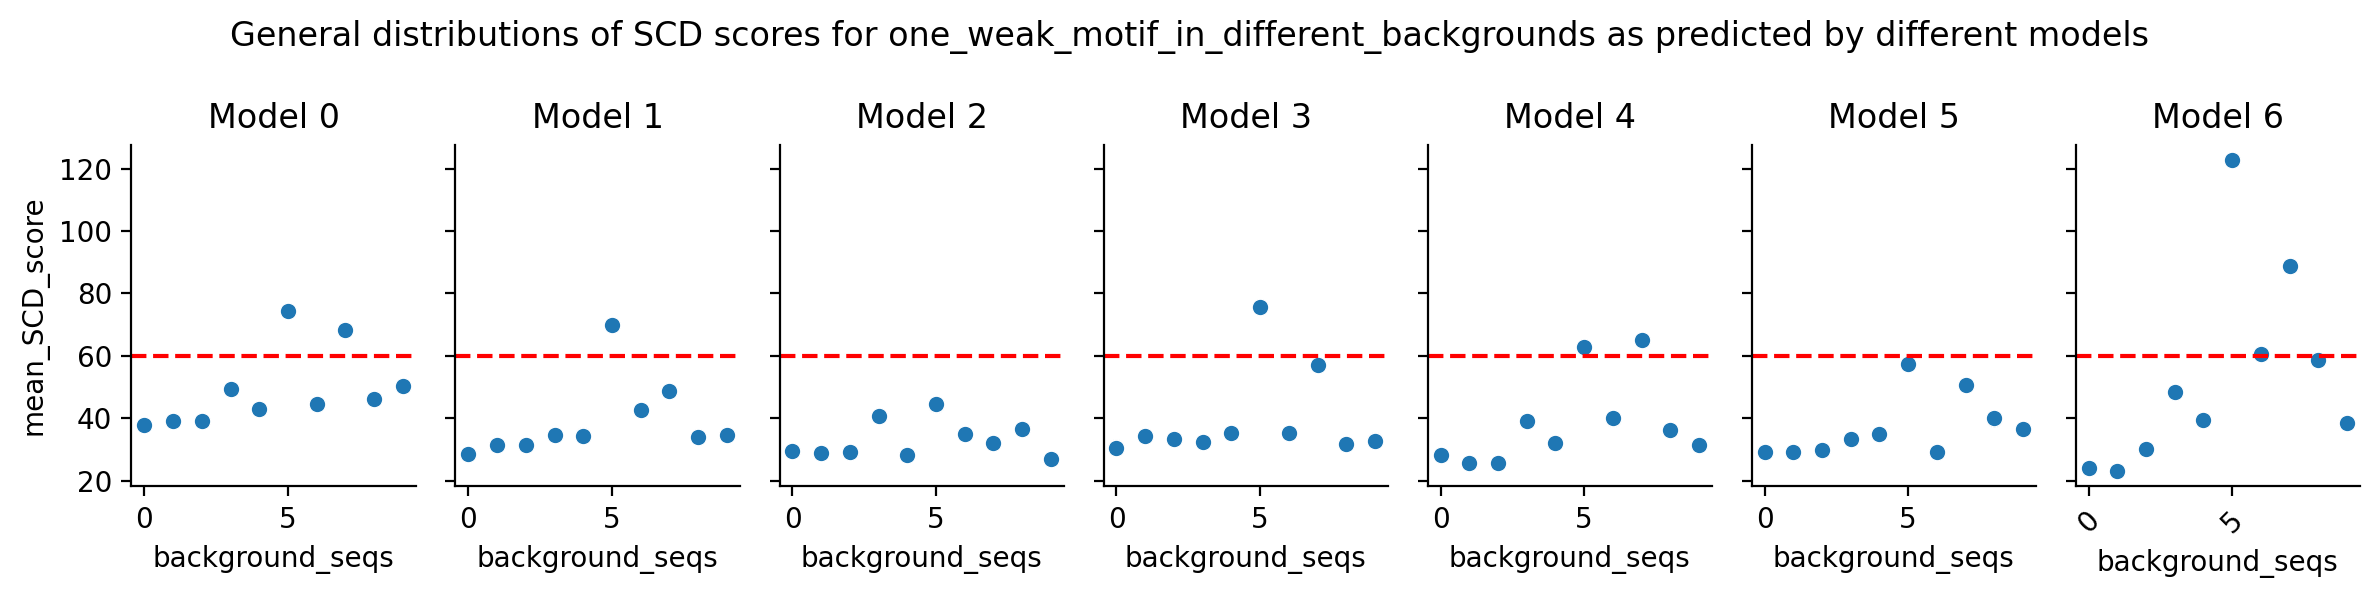

In [ ]:
# fig, ax = plt.subplots(figsize=(16, 5),dpi=200)
# dataframe = one_strong_motif_in_different_backgrounds_df
# sns.scatterplot(
#     data=dataframe, y="mean_SCD_score", x='background_seqs',
# )
# sns.despine(top = True, right = True)
# ax.axhline(y=60, color='r', linestyle='--')
# # ax.set_ylim(20,70)
# plt.title(f"General distributions of SCD scores for one_strong_motif_in_different_backgrounds *n={dataframe.shape[0]}*")
# # plt.xticks(rotation=90)
# plt.show()

    
fig, axs = plt.subplots(1, 7, figsize=(12, 3), dpi=200, sharey=True)

for model, ax in zip([0, 1, 2, 3, 4, 5, 6], axs):
    sns.scatterplot(
        data=one_weak_motif_in_different_backgrounds_df,
        x="background_seqs",
        y=f"mean_SCD_score_m{model}",
        ax=ax,
    )
    sns.despine(top=True, right=True, ax=ax)
    ax.axhline(y=60, color="r", linestyle="--")
    ax.set_title(f"Model {model}")
    ax.set_ylabel("mean_SCD_score")
    
plt.suptitle("General distributions of SCD scores for one_weak_motif_in_different_backgrounds as predicted by different models")
plt.tight_layout()
plt.show()

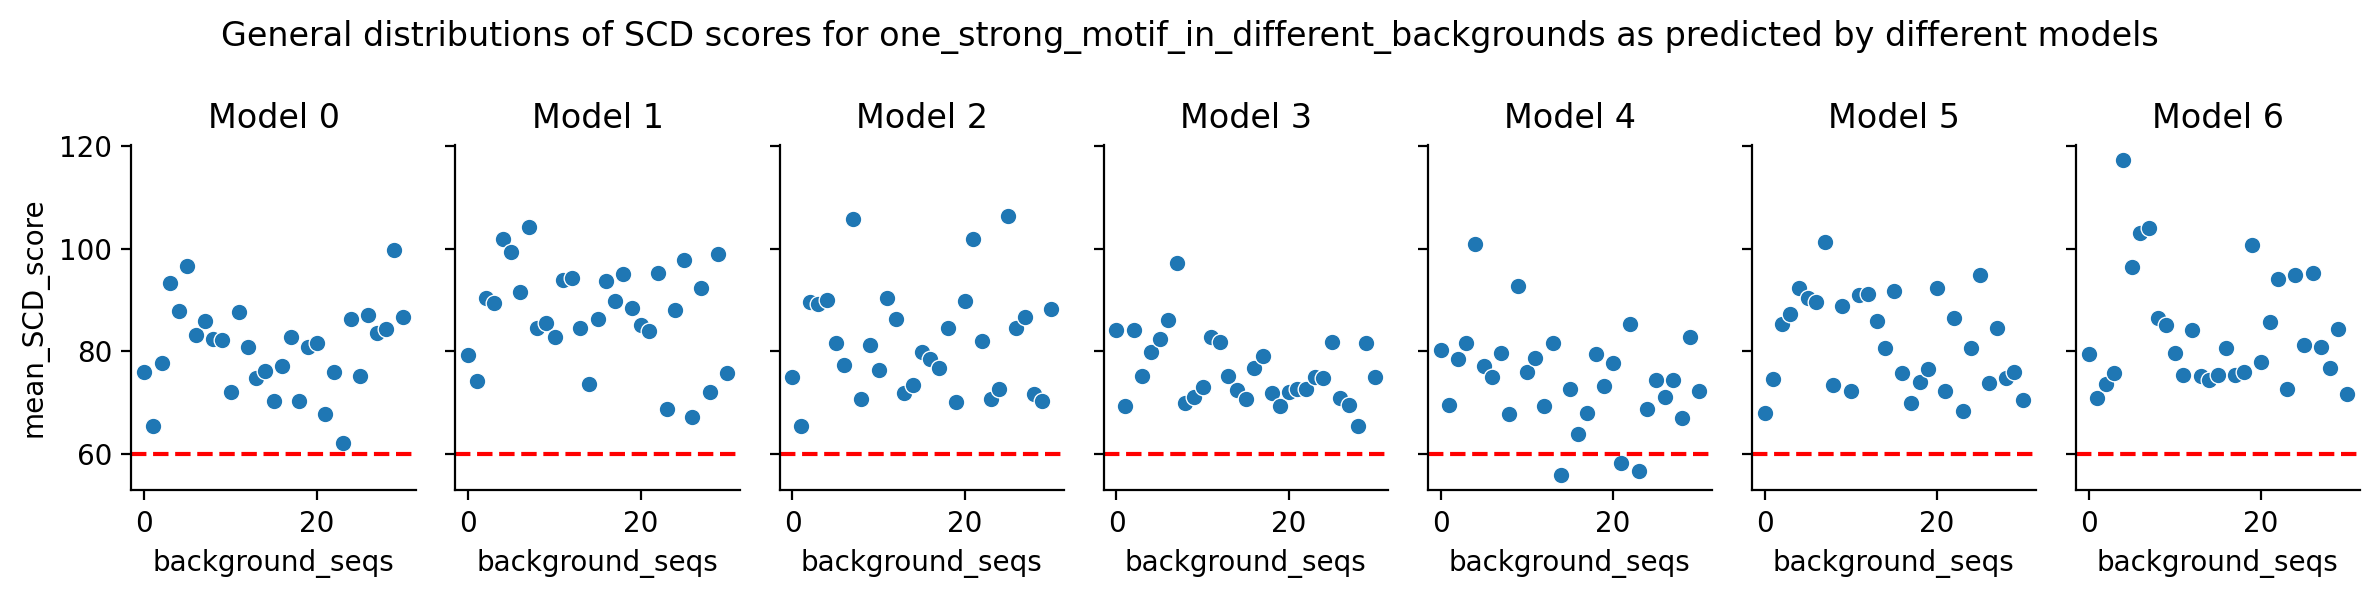

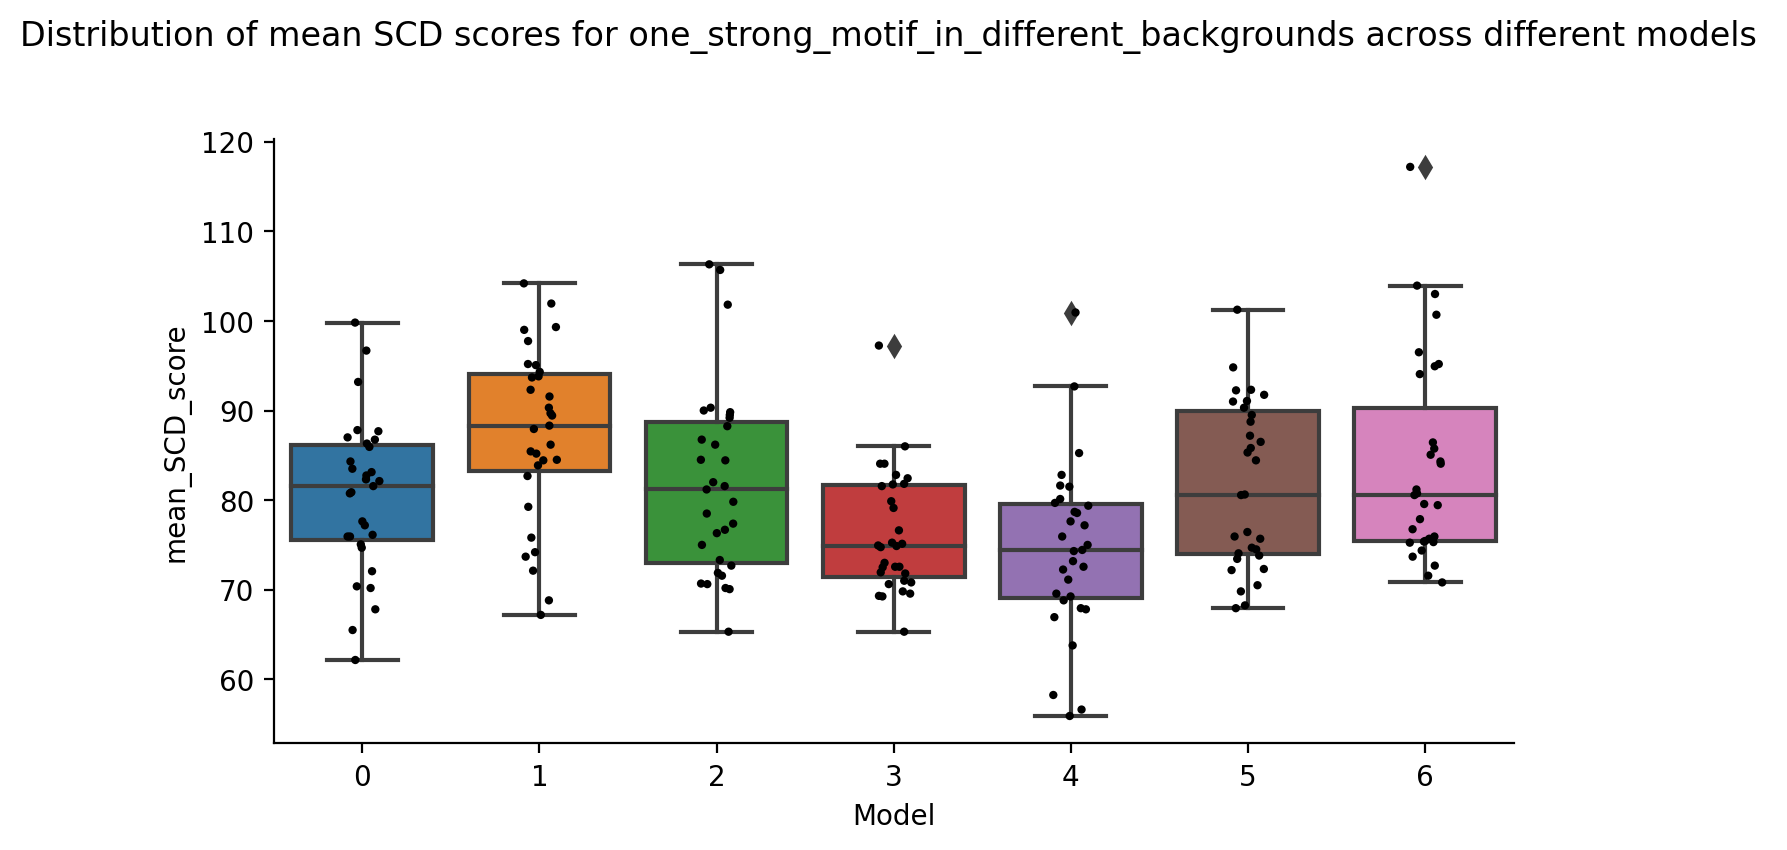

In [17]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

data = [one_strong_motif_in_different_backgrounds_df[f"mean_SCD_score_m{i}"] for i in range(7)]

sns.boxplot(
    data=data,
    ax=ax,
)
sns.stripplot(
    data=data,
    ax=ax,
    jitter=True,
    color='black',
    size=3
)

sns.despine(top=True, right=True)

ax.set_xlabel("Model")
ax.set_ylabel("mean_SCD_score")

plt.title("Distribution of mean SCD scores for one_strong_motif_in_different_backgrounds across different models \n \n ")
plt.show()

